# Customer Segmentation with RFM Analysis

![iStock-1205428317%20%281%29(1).jpg](attachment:iStock-1205428317%20%281%29(1).jpg)
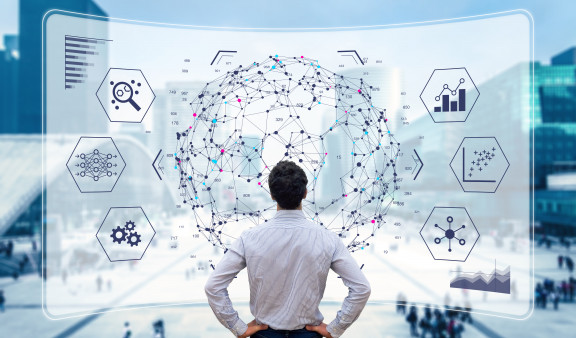

#### This dataset contains all purchases made for an online retail company based in the UK during an eight month period.



In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import openpyxl
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# virgülden sonra kaç basamağını göstereyim - lambda kısmı

In [2]:
df_ = pd.read_excel('online_retail_II.xlsx',sheet_name="Year 2009-2010")

In [3]:
df = df_.copy()

In [4]:
def datareview(dataframe):
    print("******head******")
    print(dataframe.head(10))
    print("******shape******")
    print(dataframe.shape)
    print("******info********")
    print(dataframe.info())
    print("******describe********")
    print(dataframe.describe().T)
    print("***** Nan data********")
    print(dataframe.isnull().sum())

In [5]:
datareview(df)

******head******
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00  6.950    13085.000  United Kingdom  
1 2009-12-01 07:45:00  6.750    13085.000  United Kingdom  
2 2009-12-01 07:45:00  6.750    

In [6]:
df.dropna(inplace=True)

In [7]:
def uniqcount(dataframe):
    for col in dataframe:
        df[col].unique()
        print(f'sayılan:{col}')
        print(df[col].unique())
        
        
def nuniqcount(dataframe):
    for col in dataframe:
        df[col].nunique()
        print(f'sayılan:{col}')
        print(df[col].nunique())

In [8]:
uniqcount(df)

sayılan:Invoice
[489434 489435 489436 ... 538169 538170 538171]
sayılan:StockCode
[85048 '79323P' '79323W' ... 22936 22935 22933]
sayılan:Description
['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'BAKING MOULD ROSE MILK CHOCOLATE'
 'BAKING MOULD CHOCOLATE CUP CAKES' 'BAKING MOULD EASTER EGG MILK CHOC']
sayılan:Quantity
[   12    48    24    10    18     3    16     4     2     6     8     1
    28    30    60    32    56     9    25    36    20   -12    -6    -4
   -24    -3    -2   576   288    27    64   160     5    -1    72    50
    54     7   800    11    58   192    96   144   100   180   216    15
   240   108    33    90    81   -81   -48    17    -5    40    -8    -9
    13    21   120   200   168    19   280   128  -150   -18   -23    80
   300   450    14    61   480    -7    46   504    45  4320  5184  4008
    22   600   505   500    23    47   432   252    75   -16  -504  -600
  -252  -246   -36   360   107    49    42    66   -1

['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Nigeria'
 'Malta' 'RSA' 'Singapore' 'Bahrain' 'Thailand' 'Israel' 'Lithuania'
 'West Indies' 'Korea' 'Brazil' 'Canada' 'Iceland']


In [9]:
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    3245
REGENCY CAKESTAND 3 TIER              1872
STRAWBERRY CERAMIC TRINKET BOX        1536
ASSORTED COLOUR BIRD ORNAMENT         1376
HOME BUILDING BLOCK WORD              1229
Name: Description, dtype: int64

In [10]:
df.groupby("Description").agg({"Quantity": "sum"}).head()

,Quantity
Description,
DOORMAT UNION JACK GUNS AND ROSES,169
3 STRIPEY MICE FELTCRAFT,661
4 PURPLE FLOCK DINNER CANDLES,200
ANIMAL STICKERS,385
BLACK PIRATE TREASURE CHEST,47


In [11]:
nuniqcount(df)

sayılan:Invoice
23587
sayılan:StockCode
4031
sayılan:Description
4459
sayılan:Quantity
500
sayılan:InvoiceDate
21786
sayılan:Price
664
sayılan:Customer ID
4383
sayılan:Country
37


In [12]:
df.sort_values(by='Quantity', ascending=False).head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.100,13902.000,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.100,13902.000,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.100,13902.000,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.100,13902.000,Denmark
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.100,13902.000,Denmark


In [13]:
df = df[~df["Invoice"].str.contains("C", na=False)]

In [14]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [15]:
df["InvoiceDate"].max()

Timestamp('2010-12-09 20:01:00')

In [16]:
today_date = dt.datetime(2010, 12, 11)
today_date

datetime.datetime(2010, 12, 11, 0, 0)

In [17]:
RFM = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                  'Invoice': lambda x: x.nunique(),
                                  'TotalPrice': lambda x: x.sum()})

In [18]:
RFM.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.000,165,11,372.860
12347.000,3,2,1323.320
12348.000,74,1,222.160
12349.000,43,3,2671.140
12351.000,11,1,300.930


In [19]:
RFM.columns = ["recency", "frequency","monetary"]

In [20]:
RFM.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4314.000,91.270,96.944,1.000,18.000,53.000,136.000,374.000
frequency,4314.000,4.454,8.169,1.000,1.000,2.000,5.000,205.000
monetary,4314.000,2047.289,8912.523,0.000,307.950,705.550,1722.802,349164.350


In [21]:
RFM = RFM[RFM["monetary"] > 0]

In [22]:
RFM.shape

(4312, 3)

In [23]:
RFM["recency_score"] = pd.qcut(RFM["recency"], 5, labels=[5, 4, 3, 2, 1])

RFM["frequency_score"] = pd.qcut(RFM["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

RFM["monetary_score"] = pd.qcut(RFM["monetary"], 5, labels=[1, 2, 3, 4, 5])



In [24]:
RFM.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
Customer ID,,,,,,
12346.000,165,11,372.860,2,5,2
12347.000,3,2,1323.320,5,2,4
12348.000,74,1,222.160,2,1,1
12349.000,43,3,2671.140,3,3,5
12351.000,11,1,300.930,5,1,2


In [25]:
RFM["RF_SCORE"] = (RFM['recency_score'].astype(str) +
                    RFM['frequency_score'].astype(str))

In [26]:
# regular exp. basic
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [27]:
RFM['segment'] = RFM['RF_SCORE'].replace(seg_map, regex=True)

In [28]:
RFM.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
Customer ID,,,,,,,,
12346.000,165,11,372.860,2,5,2,25,cant_loose
12347.000,3,2,1323.320,5,2,4,52,potential_loyalists
12348.000,74,1,222.160,2,1,1,21,hibernating
12349.000,43,3,2671.140,3,3,5,33,need_attention
12351.000,11,1,300.930,5,1,2,51,new_customers


In [29]:
RFM[["segment", "recency", "frequency" ,"monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep       53.819   343     1.201   343  441.320   343
at_Risk             152.159   611     3.074   611 1188.878   611
cant_loose          124.117    77     9.117    77 4099.450    77
champions             7.119   663    12.554   663 6852.264   663
hibernating         213.886  1015     1.126  1015  403.978  1015
loyal_customers      36.287   742     6.830   742 2746.067   742
need_attention       53.266   207     2.449   207 1060.357   207
new_customers         8.580    50     1.000    50  386.199    50
potential_loyalists  18.793   517     2.017   517  729.511   517
promising            25.747    87     1.000    87  367.087    87

In [30]:
RFM[RFM["segment"] == "about_to_sleep"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
Customer ID,,,,,,,,
12353.000,44,1,317.760,3,1,2,31,about_to_sleep
12379.000,58,2,767.980,3,2,3,32,about_to_sleep
12387.000,51,1,143.940,3,1,1,31,about_to_sleep
12400.000,50,1,205.250,3,1,1,31,about_to_sleep
12411.000,45,1,346.900,3,1,2,31,about_to_sleep


In [31]:
RFM[RFM["segment"] == "champions"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
Customer ID,,,,,,,,
12360.000,15,5,1590.830,5,4,4,54,champions
12395.000,7,4,2048.640,5,4,4,54,champions
12415.000,11,7,19543.840,5,5,5,55,champions
12429.000,1,5,3735.510,5,4,5,54,champions
12431.000,9,13,4370.520,5,5,5,55,champions


In [32]:
RFM[RFM["segment"] == "cant_loose"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
Customer ID,,,,,,,,
12346.000,165,11,372.860,2,5,2,25,cant_loose
12380.000,101,7,6951.490,2,5,5,25,cant_loose
12482.000,212,29,23691.400,1,5,5,15,cant_loose
12510.000,95,7,4195.450,2,5,5,25,cant_loose
12891.000,94,8,509.500,2,5,3,25,cant_loose


In [33]:
RFM[RFM["segment"] == "loyal_customers"].index

Float64Index([12359.0, 12402.0, 12409.0, 12417.0, 12422.0, 12435.0, 12437.0,
              12454.0, 12476.0, 12500.0,
              ...
              18220.0, 18223.0, 18231.0, 18236.0, 18241.0, 18247.0, 18276.0,
              18277.0, 18283.0, 18287.0],
             dtype='float64', name='Customer ID', length=742)

In [34]:
new_df = pd.DataFrame()

In [35]:
new_df["loyal_customers_id"] = RFM[RFM["segment"] == "loyal_customers"].index

In [36]:
new_df["loyal_customers_id"] = new_df["loyal_customers_id"].astype(int)

In [37]:
new_df

,loyal_customers_id
0,12359
1,12402
2,12409
3,12417
4,12422
...,...
737,18247
738,18276
739,18277
740,18283


###### new_df.to_csv("loyal_customers_id")